Edie Miglio

email: edie.miglio@polimi.it

Subject for the emails: NAML2023

# Introduction to Python

## Project 9: solve the 1D Laplacian by FDM

**Skills.**
* Numpy
* numpy arrays (vectors and matrices)
* Intro to Scipy


**Problem.** We want to solve, using Finite Differences, the following problem:

$$
-u^{\prime\prime} = g(x), \quad \textrm{ in } \Omega=(0,2\pi),\\
u(0)=u(2\pi)=0.
$$

with $g(x) = sin(x)$.  

The solution is simply $u(x) = sin(x)$.

We'll use a grid of $N$ points with $x_0=0, x_{N-1}=2\pi$ and $\Delta x=\frac{2\pi}{N-1}$.

In each point of the grid the equation can be discretized as:

$$-\frac{u_{i+1} - 2 u_i + u_{i-1}}{\Delta x^2} = g_i,$$

where $g_i=g(x_i)$.

We keep the boundary points fixed, so we only need to solve for the $N-2$ interior points.  Near the boundaries, our difference is:
$$-u_2 + 2 u_1 = \Delta x^2 g_1$$

and

$2u_{N-1} - u_{N-2} = \Delta x^2 g_{N-1}$.

We can write the system of equations for solving for the $N-2$ interior points as:

\begin{equation}
A = \left (
\begin{array}{ccccccc}
2 &  -1 &    &        &         &           &          \newline
-1  & 2 &  -1 &        &         &           &          \newline
   &  -1 & 2 & -1      &         &           &          \newline
   &         & \ddots & \ddots & \ddots  &           &          \newline
   &         &        & \ddots & \ddots  & \ddots  &          \newline
   &         &        &        & -1       & 2 & -1  \newline
   &         &        &        &         & -1  & 2 \newline
\end{array}
\right )
\end{equation}

\begin{equation}
{\bf u} = \left (
\begin{array}{c}
u_\mathrm{1} \\\
u_\mathrm{2} \\\
u_\mathrm{3} \\\
\vdots \\\
\vdots \\\
u_\mathrm{N-2} \\\
u_\mathrm{N-1} \\\
\end{array}
\right ), \quad
{\bf g} = \Delta x^2 \left (
\begin{array}{c}
g_\mathrm{1} \\\
g_\mathrm{2} \\\
g_\mathrm{3} \\\
\vdots \\\
\vdots \\\
g_\mathrm{N-2} \\\
g_\mathrm{N-1}\\\
\end{array}
\right )
\end{equation}

Then we just solve $A {\bf u} = {\bf g}$

In [1]:
import numpy as np
d=np.array([2, 2, 2])
l=np.array([-1,-1])
u=l
A=np.diag(d)+np.diag(l,-1)+np.diag(u,1)
v=np.array([1,2,3])
print(A)
np.dot(v,v)
L, _= np.linalg.eig(A)
L

[[ 2 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]


array([3.41421356, 2.        , 0.58578644])

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

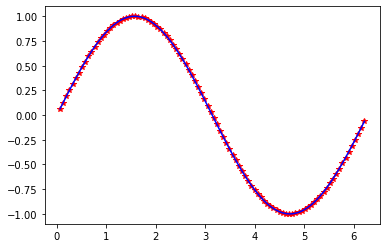

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Generation of the grid (including endpoints)
N = 100 # Number of points
x = np.linspace(0.0, 2.0*np.pi, N, endpoint=True)
dx = x[1]-x[0]
# Source term
g = np.sin(x)

# Vectors for building the matrix
e = np.ones(N-2)
d =2*e
e1 = -1*np.ones(N-3)
u=e1
l=e1

# Construction of the matrix
A=np.diag(d)+np.diag(u,1)+np.diag(l,-1)

# Construction of the RHS
g = dx**2*g[1:N-1]

# Solution of the linear system (Au=g)
u=np.linalg.solve(A,g)

# Computation of the true solution
u_ex = np.sin(x[1:N-1])

# Plot the numerical solution (red stars) against the true solution (blue)
plt.plot(x[1:N-1], u, 'r*', x[1:N-1], u_ex, 'b')


## Project 10: Computation of an integral

**Skills.**

* lambda functions
* Scipy module
* <code>quad</code> function
* Simpy module

**Problem.** Compute numerically the integral of the function $f(x)=1/x$ with $1\leq x \leq 5$, *i.e.*
$$
I = \int_1^5 \frac{1}{x}dx.
$$

In [ ]:
from scipy import integrate
f = lambda x:1/x
res=integrate.quad(f, 1, 5)
res

(1.6094379124341014, 3.6599536780638603e-09)

In [ ]:
import sympy as sy
x = sy.symbols('x')
sy.integrate(1/x,x)

log(x)

In [ ]:
I=sy.integrate(1/x, (x, 1, 5))
I

log(5)

In [ ]:
float(I)

1.6094379124341003

In [ ]:
sy.diff(1/x,x)

-1/x**2

## Project 11: 3D Function plot and minimization

**Skills.**


*   Plot 3D functions
*   Scipy module
*   Minimization



**Problem.** Consider the Himmelblau's function given by:
$$
f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2.
$$
It has one local maximum at $(-0.270845,-0.923039)$ where $f(x,y)=181.617$ and four identical local minima:

* $f(3.0,2.0)=0.0$,
* $f(-2.805118,3.131312)=0.0$,
* $f(-3.779310,-3.283186)=0.0$,
* $f(3.584428,-1.848126)=0.0$.

Plot the function for $x\in[-5,5]$ and $y\in[-5,5]$.

In [ ]:
import numpy as np
x=np.arange(0,1.2,0.2)
y=x
[X,Y]=np.meshgrid(x,y)

In [ ]:
Y

array([[0. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
       [0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
       [1. , 1. , 1. , 1. , 1. , 1. ]])

In [ ]:
X

array([[0. , 0.2, 0.4, 0.6, 0.8, 1. ],
       [0. , 0.2, 0.4, 0.6, 0.8, 1. ],
       [0. , 0.2, 0.4, 0.6, 0.8, 1. ],
       [0. , 0.2, 0.4, 0.6, 0.8, 1. ],
       [0. , 0.2, 0.4, 0.6, 0.8, 1. ],
       [0. , 0.2, 0.4, 0.6, 0.8, 1. ]])

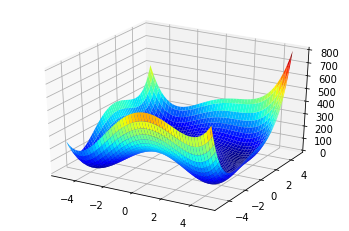

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Himmelblau function
def Himmelblau(x):
	return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 -7)**2

# Create the vectors for
xaxis = np.arange(-5, 5, 0.1)
yaxis = np.arange(-5, 5, 0.1)
# Create a mesh from the axis
X, Y = np.meshgrid(xaxis, yaxis)
# Compute Z
Z = Himmelblau([X,Y])
# Create a surface plot
fig = plt.figure()
axis=plt.subplot(projection='3d')
axis.plot_surface(X,Y,Z, cmap='jet')
# show the plot
plt.show()
fig.savefig('pippo.png')

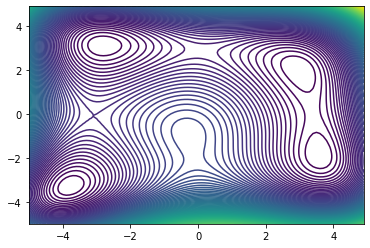

In [ ]:
fig = plt.figure()
axis=plt.subplot()
axis.contour(X,Y,Z,100)
# show the plot
plt.show()

In [ ]:
from scipy import optimize

res = optimize.minimize(Himmelblau, x0=[3, 3])
res.x

array([2.99999999, 1.99999999])

## Project 12: Visualize COVID data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
covid = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv')
#covid.head()
#covid.shape
#covid.dtypes
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


In [ ]:
#covid.head()
covid.shape
#covid.dtypes

(161568, 5)

In [ ]:
covid.dtypes

In [ ]:
# Date is object type, need to conver it to datetime format
import matplotlib.dates as mdates
covid1 = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv',
                     parse_dates = ['Date'])
covid1.dtypes
# covid1.head()

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [ ]:
# Sum of total cases -> creating a new column
covid1['Total Confirmed'] = covid1[['Confirmed', 'Recovered', 'Deaths']].sum(axis = 1)
covid1.tail()

,Date,Country,Confirmed,Recovered,Deaths,Total Confirmed
161563,2022-04-12,Zimbabwe,247094,0,5460,252554
161564,2022-04-13,Zimbabwe,247160,0,5460,252620
161565,2022-04-14,Zimbabwe,247208,0,5462,252670
161566,2022-04-15,Zimbabwe,247237,0,5462,252699
161567,2022-04-16,Zimbabwe,247237,0,5462,252699


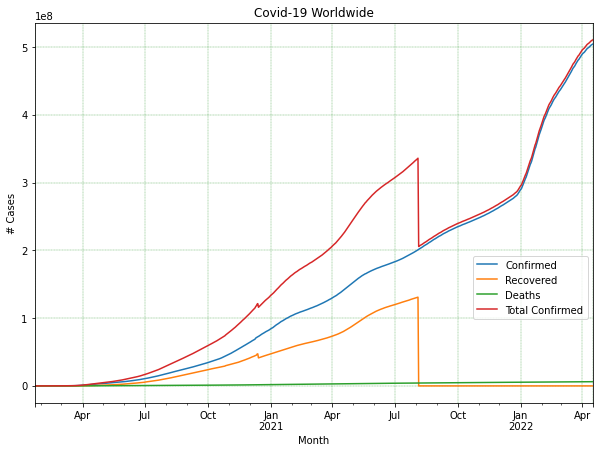

In [ ]:
# Plotting for wordlwide cases
worldwide = covid1.groupby(['Date']).sum()
c = worldwide.plot(figsize = (10, 7))
c.set_xlabel('Month')
c.set_ylabel('# Cases')
c.title.set_text('Covid-19 Worldwide')

plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)

plt.legend(bbox_to_anchor=(1.0, 0.4))

plt.show()

In [ ]:
Italy = covid1[covid1['Country'] =='Italy'].groupby(['Date']).sum()
Italy.tail()

,Confirmed,Recovered,Deaths,Total Confirmed
Date,,,,
2022-04-12,15404809,0,161032,15565841
2022-04-13,15467395,0,161187,15628582
2022-04-14,15533012,0,161336,15694348
2022-04-15,15595302,0,161469,15756771
2022-04-16,15659835,0,161602,15821437


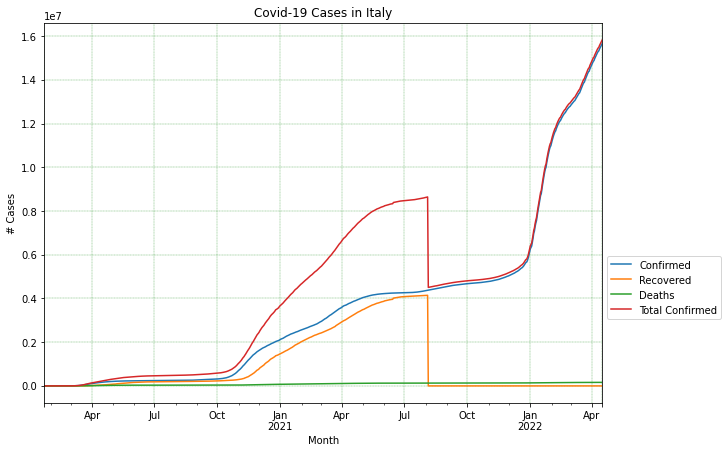

In [ ]:
I = Italy.plot(figsize = (10, 7))
I.set_xlabel('Month')
I.set_ylabel('# Cases')
I.title.set_text('Covid-19 Cases in Italy')

plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)

plt.legend(bbox_to_anchor=(1.0, 0.4))

plt.show()

In [ ]:
day = '2022-04-16'
last_covid=covid1[covid1['Date']==day ]
top_10=last_covid.sort_values(['Confirmed'],ascending=False)[:10]

In [ ]:
last_covid

,Date,Country,Confirmed,Recovered,Deaths,Total Confirmed
815,2022-04-16,Afghanistan,178387,0,7676,186063
1631,2022-04-16,Albania,274462,0,3496,277958
2447,2022-04-16,Algeria,265739,0,6874,272613
3263,2022-04-16,Andorra,40709,0,153,40862
4079,2022-04-16,Angola,99194,0,1900,101094
...,...,...,...,...,...,...
158303,2022-04-16,West Bank and Gaza,656617,0,5656,662273
159119,2022-04-16,Winter Olympics 2022,535,0,0,535
159935,2022-04-16,Yemen,11817,0,2148,13965
160751,2022-04-16,Zambia,318467,0,3973,322440


In [ ]:
top_10

,Date,Country,Confirmed,Recovered,Deaths,Total Confirmed
150143,2022-04-16,US,80625120,0,988609,81613729
66095,2022-04-16,India,43042097,0,521751,43563848
20399,2022-04-16,Brazil,30250077,0,662185,30912262
52223,2022-04-16,France,27874269,0,145159,28019428
55487,2022-04-16,Germany,23416663,0,132942,23549605
153407,2022-04-16,United Kingdom,21916961,0,172014,22088975
119135,2022-04-16,Russia,17801103,0,365774,18166877
76703,2022-04-16,"Korea, South",16305752,0,21092,16326844
70991,2022-04-16,Italy,15659835,0,161602,15821437
149327,2022-04-16,Turkey,14991669,0,98551,15090220


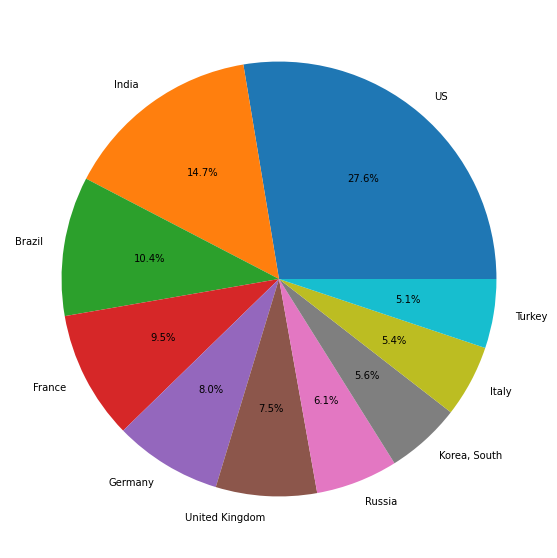

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot()
ax.pie(top_10['Confirmed'],labels=top_10['Country'],autopct='%1.1f%%');